# 1- CLASIFICACION CON NAIVE BAYES

# **CLASE 2**

### 1- Importar los datos

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
solicitantes = pd.read_excel('/content/drive/MyDrive/0. SolicitantesCrédito.xlsx')

In [4]:
solicitantes

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Estrato,Nivel de estudios,Tipo de contrato,Ingresos,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,1,38,NR,Casado,1,0,3,Bachiller,Ninguno,5424576,...,48,82691.506204,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.041659,582.478943,0.063702
1,2,51,NR,Separado,6,1,4,Técnico,Ninguno,1144064,...,36,22781.212598,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1.0,0.234951,479.839966,0.465636
2,3,37,Mujer,Casado,2,0,3,Tecnólogo,Indefinido,2069853,...,36,46294.596244,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0.0,0.170330,417.653107,0.290071
3,4,29,NR,Separado,1,0,2,Tecnólogo,Ninguno,1893080,...,24,69564.950015,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.201659,316.791107,0.278389
4,5,42,Mujer,Casado,3,4,2,Especializacion,Ninguno,3000367,...,24,112478.307883,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.140929,441.809570,0.203359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,8374,31,Hombre,Soltero,2,0,5,Bachiller,Indefinido,5891088,...,48,115108.056436,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.035120,659.471375,0.066962
8374,8375,38,Hombre,Separado,0,0,3,Bachiller,Labor Contratada,3092079,...,36,96789.562091,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1.0,0.101976,465.011536,0.165936
8375,8376,43,Mujer,Casado,1,2,2,Tecnólogo,Ninguno,2542007,...,36,49713.608249,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.156707,423.237305,0.247763
8376,8377,37,Mujer,Casado,1,2,3,Tecnólogo,Indefinido,5677067,...,36,163602.818587,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.037719,592.670837,0.051356


### 2-Limpiamos los datos

In [5]:
solicitantes.shape

(8378, 35)

In [6]:
## Eliminar los registros donde PreApr esta vacio
XD = solicitantes.dropna(subset=['PreApr'])

In [7]:
## Escojo solo las variables que voy a usar como independientes
XD = XD[['Edad', 'Ingresos', 'Egresos', 'Monto (EAD)']]

In [8]:
XD

,Edad,Ingresos,Egresos,Monto (EAD)
0,38,5424576,7585302,2.815030e+06
1,51,1144064,1640079,6.301439e+05
2,37,2069853,2831440,1.280540e+06
3,29,1893080,2482276,1.393414e+06
4,42,3000367,3630221,2.252986e+06
...,...,...,...,...
8371,48,4831392,3392105,3.366188e+06
8373,31,5891088,4292158,3.918572e+06
8374,38,3092079,3028098,2.677266e+06
8375,43,2542007,3513112,1.375112e+06


In [9]:
## Escojo la variable dependiente
yd = solicitantes['PreApr'].dropna()

In [10]:
yd

,PreApr
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
8371,1.0
8373,1.0
8374,1.0
8375,1.0


### 3-Implementamos el modelo de Naive Bayes

In [11]:
from numpy import nanpercentile
### Importamos las medidas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB

In [12]:
### Convierto los datasets a arrays
XDArray = np.array(XD)
ydArray= np.array(yd)

In [13]:
XDArray

array([[3.80000000e+01, 5.42457600e+06, 7.58530200e+06, 2.81503004e+06],
       [5.10000000e+01, 1.14406400e+06, 1.64007900e+06, 6.30143930e+05],
       [3.70000000e+01, 2.06985300e+06, 2.83144000e+06, 1.28054021e+06],
       ...,
       [3.80000000e+01, 3.09207900e+06, 3.02809800e+06, 2.67726552e+06],
       [4.30000000e+01, 2.54200700e+06, 3.51311200e+06, 1.37511242e+06],
       [3.70000000e+01, 5.67706700e+06, 5.26427300e+06, 4.52536592e+06]])

In [14]:
ydArray

array([1., 1., 0., ..., 1., 1., 1.])

In [15]:
### ENTRENAMOS EL MODELOS (Fase Train)
modeloNB = GaussianNB() #variable que aloja el modelo
modeloNB.fit(XDArray, ydArray)

GaussianNB()

In [16]:
## predecimos los yd (Etapa Test)
ydPred = modeloNB.predict(XDArray) #ctrl shift enter para mmostrar

### 4-Matriz de confusion

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cm = confusion_matrix(ydArray, ydPred)
cm

array([[2503,  456],
       [ 938, 1945]])

###5-Calcular las metricas de evaluacion del modelo

In [19]:
#Extraer los valores de la matriz de confusion
VN = cm[0,0] ; FP = cm[0,1] ; FN = cm[1,0] ; VP = cm[1,1]

In [20]:
## Exactitud
exactitud = (VP + VN)/ cm.sum()

## Error
error = (FP + FN)/ cm.sum()

##Precision
precision = VP / (VP + FP)

##Sensibilidad
sensibilidad = VP / (VP + FN)

##Especificidad
especificidad = VN / (VN + FP)

In [21]:
## imprimo los mensajes
print(f'la exactitud del modelo es de {exactitud:.2%}')
print(f'el error del modelo es de {error:.2%}')
print(f'la precision del modelo es de {precision:.2%}')
print(f'la sensibilidad del modelo es de {sensibilidad:.2%}')
print(f'la especificidad del modelo es de {especificidad:.2%}')

la exactitud del modelo es de 76.14%
el error del modelo es de 23.86%
la precision del modelo es de 81.01%
la sensibilidad del modelo es de 67.46%
la especificidad del modelo es de 84.59%


##6-GENERALIZACION DEL MODELO
(pronostico para solicitantes nuevos)

In [22]:
XDGener = solicitantes[solicitantes['PreApr'].isna()]
XDGener

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Estrato,Nivel de estudios,Tipo de contrato,Ingresos,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
6,7,38,NR,Soltero,3,0,3,Profesional,Indefinido,1534711,...,60,2.009414e+04,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
7,8,47,Mujer,Casado,0,0,2,Profesional,Ninguno,136750,...,48,3.563229e+03,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
11,12,46,Mujer,Casado,0,1,4,Primaria,Indefinido,7097220,...,3,1.090054e+06,Buenas Referencias,Con Codeudor(es),Prop.sin Hipoteca,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
13,14,37,Mujer,Soltero,4,2,2,Técnico,Ninguno,1791987,...,48,6.856249e+04,Buena Experiencia CFB,Sin Codeudor,Prop.sin Hipoteca,Mora mayor a 60 Dìas,NaN,NaN,NaN,NaN
16,17,22,NR,Unión Libre,1,0,2,Bachiller,Fijo,2892545,...,36,6.824255e+04,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,8358,24,NR,Casado,1,0,4,Técnico,Fijo,2433168,...,48,1.026380e+05,Buenas Referencias,Con Codeudor(es),Vehìculo sin Prenda,Sin experiencia,NaN,NaN,NaN,NaN
8358,8359,66,Hombre,Unión Libre,1,0,1,Técnico,Indefinido,83684,...,24,1.908509e+03,Buenas Referencias,Libranza Establecida,Sin Patrimonio,Mora mayor a 60 Dìas,NaN,NaN,NaN,NaN
8367,8368,32,NR,Unión Libre,0,1,4,Bachiller,Fijo,1133063,...,36,3.665316e+04,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
8372,8373,35,Hombre,Separado,2,1,3,Primaria,Indefinido,3073152,...,18,1.375805e+05,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN


In [23]:
##Filtro las variables
XDGener = XDGener[['Edad', 'Ingresos', 'Egresos', 'Monto (EAD)']]

In [24]:
##Las convierto en arreglo
XDGenerArray = np.array(XDGener)

In [25]:
##generalizo (genero las predicciones para los solicitantes faltantes)
ydGener = modeloNB.predict(XDGenerArray)

# **RETO 1**

In [26]:
import pandas as pd

In [27]:
solicitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8378 non-null   int64  
 1   Edad                     8378 non-null   int64  
 2   Sexo                     8378 non-null   object 
 3   Estado civil             8378 non-null   object 
 4   Hijos                    8378 non-null   int64  
 5   Perscargo                8378 non-null   int64  
 6   Estrato                  8378 non-null   int64  
 7   Nivel de estudios        8378 non-null   object 
 8   Tipo de contrato         8378 non-null   object 
 9   Ingresos                 8378 non-null   int64  
 10  Egresos                  8378 non-null   int64  
 11  Tipo de actividad        8378 non-null   object 
 12  Tipo de vivienda         8378 non-null   object 
 13  Total Activos            8378 non-null   float64
 14  Total pasivos           

In [28]:
solicitantes.shape

(8378, 35)

In [29]:
## Eliminar los registros donde PreApr esta vacio
XDR1 = solicitantes.dropna(subset=['PreApr'])

In [30]:
## Escojo solo las variables que voy a usar como independientes
XDR1 = XDR1[['Edad', 'Hijos', 'Perscargo', 'Estrato', 'Ingresos', 'Egresos', 'Monto (EAD)', 'Plazo', 'Cuota (COP)']]

In [31]:
XDR1.shape

(5842, 9)

In [32]:
ydR1 = solicitantes['PreApr'].dropna()

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB

In [34]:
XDR1Array = np.array(XDR1, dtype=float)
ydR1Array = np.array(ydR1, dtype=float)

In [35]:
modeloNBR1 = GaussianNB()
modeloNBR1.fit(XDR1Array, ydR1Array)

GaussianNB()

In [36]:
ydR1Pred = modeloNBR1.predict(XDR1Array)

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [38]:
cmR1 = confusion_matrix(ydR1, ydR1Pred)
cmR1

array([[2539,  420],
       [1041, 1842]])

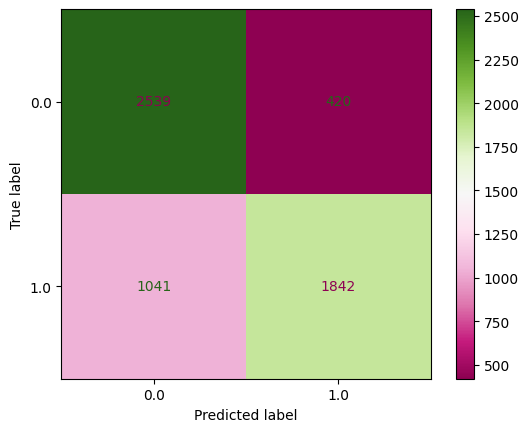

In [39]:
dispR1 = ConfusionMatrixDisplay(cmR1, display_labels=modeloNBR1.classes_)
dispR1.plot(cmap='PiYG')
plt.show()

In [40]:
XDR1Gener = solicitantes[solicitantes['PreApr'].isna()]

In [41]:
XDR1Gener = XDR1Gener[['Edad', 'Hijos', 'Perscargo', 'Estrato', 'Ingresos', 'Egresos', 'Monto (EAD)', 'Plazo', 'Cuota (COP)']]

In [42]:
ydR1Gener = modeloNBR1.predict(XDR1Gener)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [43]:
ydR1GenerSerie = pd.Series(ydR1Gener, index=solicitantes[solicitantes['PreApr'].isna()].index)

In [44]:
solicitantes['PreApr'].fillna(ydR1GenerSerie, inplace=True)

/tmp/ipython-input-1267785369.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  solicitantes['PreApr'].fillna(ydR1GenerSerie, inplace=True)


In [45]:
solicitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8378 non-null   int64  
 1   Edad                     8378 non-null   int64  
 2   Sexo                     8378 non-null   object 
 3   Estado civil             8378 non-null   object 
 4   Hijos                    8378 non-null   int64  
 5   Perscargo                8378 non-null   int64  
 6   Estrato                  8378 non-null   int64  
 7   Nivel de estudios        8378 non-null   object 
 8   Tipo de contrato         8378 non-null   object 
 9   Ingresos                 8378 non-null   int64  
 10  Egresos                  8378 non-null   int64  
 11  Tipo de actividad        8378 non-null   object 
 12  Tipo de vivienda         8378 non-null   object 
 13  Total Activos            8378 non-null   float64
 14  Total pasivos           

In [46]:
VNR1 = cmR1[0,0]
FPR1 = cmR1[0,1]
FNR1 = cmR1[1,0]
VPR1 = cmR1[1,1]

exactitudR1 = (VPR1 + VNR1) / cmR1.sum()
errorR1 = (FPR1 + FNR1) / cmR1.sum()
precisionR1 = VPR1 / (VPR1 + FPR1)
sensibilidadR1 = VPR1 / (VPR1 + FNR1)
especificidadR1 = VNR1 / (VNR1 + FPR1)

In [48]:
print('primero')
print(f'la exactitud del modelo es de {exactitud:.2%}')
print(f'el error del modelo es de {error:.2%}')
print(f'la precision del modelo es de {precision:.2%}')
print(f'la sensibilidad del modelo es de {sensibilidad:.2%}')
print(f'la especificidad del modelo es de {especificidad:.2%}\n')
print('segundo')
print(f'la exactitud del modelo es de {exactitudR1:.2%}')
print(f'el error del modelo es de {errorR1:.2%}')
print(f'la precision del modelo es de {precisionR1:.2%}')
print(f'la sensibilidad del modelo es de {sensibilidadR1:.2%}')
print(f'la especificidad del modelo es de {especificidadR1:.2%}')

primero
la exactitud del modelo es de 76.14%
el error del modelo es de 23.86%
la precision del modelo es de 81.01%
la sensibilidad del modelo es de 67.46%
la especificidad del modelo es de 84.59%

segundo
la exactitud del modelo es de 74.99%
el error del modelo es de 25.01%
la precision del modelo es de 81.43%
la sensibilidad del modelo es de 63.89%
la especificidad del modelo es de 85.81%


# **Comparación**

El segundo modelo amplio el ultimo conjunto de datos añadiendo mas factores socioeconomicos como «Edad», «Hijos», «Perscargo», «Estrato», «Ingresos», «Egresos», «Monto (EAD)», «Plazo», «Cuota (COP)».



Añadirlos no dio un modelo mas eficaz en general.

- La precisión disminuyó del 76,14 % al 74,99 %, con un aumento de la tasa de error al 25,01 %. Esto sugiere que las variables que se agregaron crearon una complejidad innecesaria entonces dificulto un poco mas la generalizacion del modelo en todo el conjunto de datos.

- La precision mejoro un poco, paso del 81,01 % al 81,43 %. Esto indica que el segundo modelo es un poquito mas fiable cuando predice un resultado positivo ya que es menos probable que de una aprobacion falsa.

- La sensibilidad descendio bastante del 67,46 % al 63,89 %, esto significa que el segundo modelo es menos eficaz al momento de identificar todos los casos positivos verdaderos, o sea que pasa por alto mas casos que el primer modelo.

- La especificidad aumento del 84,59 % al 85,81 %. El segundo modelo mejoro en la identificacion correcta de los casos negativos, tiene una tasa de falsos positivos mas bajita.

Aunque las nuevas variables si ayudaron a evitar aprobaciones erroneas tambien hicieron que fuera mucho mas estricto haciendo que se perdieran casos positivos verdaderos y el equilibrio del primer modelo.
